In [1]:
print("Hello World")

Hello World


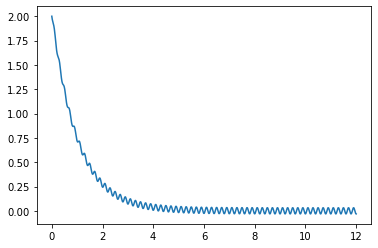

In [30]:
import math
import numpy as np
from scipy.integrate import odeint

def f(y, t):
   lam = 1
   return -lam * y + math.sin(10 * math.pi * t)

ts = np.arange(0, 12.01, 0.01)
y0 = -2
ys = odeint(f, y0, ts)

import pylab
pylab.plot(ts, ys)
pylab.savefig('odeintexample2.pdf')
pylab.show()

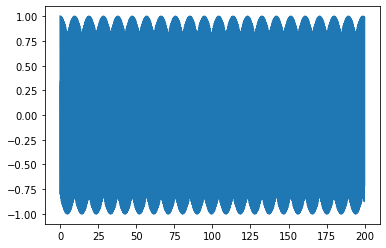

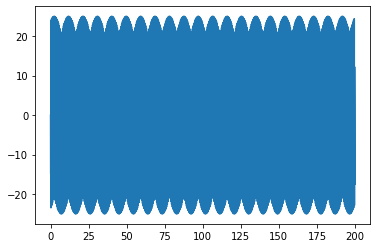

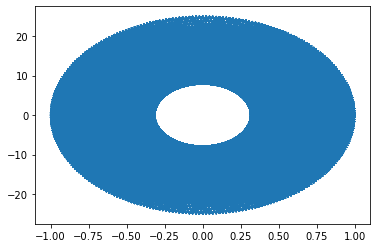

In [39]:
from numpy import array, arange
from scipy.integrate import odeint

def f(y, t):                     # right hand side, takes array(!) y
   omega = 25
   r = y[0]                      # extract r from array y
   v = y[1]                      # extract v from array y
   drdt = v                      # compute right hand side
   dvdt = -omega ** 2 * r
   return array([drdt, dvdt])    # return array

ts = arange(0, 200, 0.1)          # required times for solution
r0 = 1                           # initial r
v0 = 0                           # initial v
y0 = array([r0, v0])             # combine r and v into y

ys = odeint(f, y0, ts)           # solve ODEs

rs = ys[:, 0]                    # extract results: r(t)
vs = ys[:, 1]                    # extract results: v(t)

pylab.plot(ts,rs)
pylab.show()
pylab.plot(ts,vs)
pylab.show()
pylab.plot(rs,vs)
pylab.show()

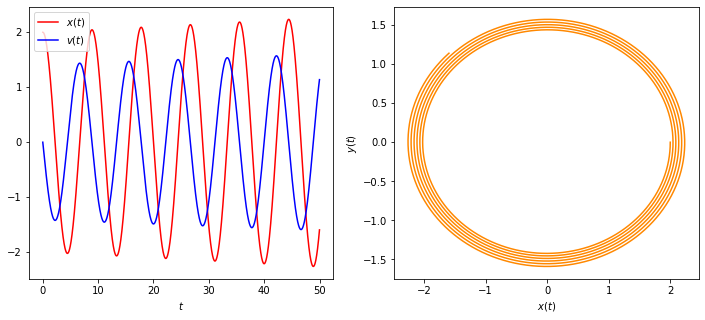

In [2]:
%matplotlib inline                      
import numpy as np
import matplotlib.pyplot as plt

def harmonic_eq(x,t,k):
    # k = 0.5
    return x[1], - k*x[0]

def euler_2var(x, func, t, k, dt):
    y = func(x,t,k)
    return x[0] + dt*y[0], x[1]+ dt*y[1]

def calc_plot2var(method, equation, k, dt, n_steps):
    t = np.arange(0, n_steps*dt, dt) 
    x = np.zeros((n_steps,2))               # n_step
    x[0][0] = 2.0                           # initial position
    for i in range(n_steps-1):  
        x[i+1] = method(x[i],harmonic_eq, t[i], k, dt)
    
    fig = plt.figure(figsize=(12,5))
    axes = fig.add_subplot(1,2,1)
    axes.plot(t, x[:,0], 'r', label="$x(t)$")
    axes.plot(t, x[:,1], 'b', label="$v(t)$")
    axes.set_xlabel("$t$")
    
    plt.legend(loc='upper left')
    
    #plot a trajectory
    axes = fig.add_subplot(1,2,2)
    axes.plot(x[:,0], x[:,1],'#ff8800')
    axes.set_xlabel("$x(t)$")
    axes.set_ylabel("$y(t)$")
    plt.show()

if __name__ == "__main__" :
    dt = 0.01
    n_steps = 5000
    k = 0.5
    calc_plot2var(euler_2var, harmonic_eq, k, dt, n_steps)